In [3]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from DLC_for_WBFM.utils.projects.finished_project_data import ProjectData
import napari
import pandas as pd
import numpy as np
from DLC_for_WBFM.utils.feature_detection.class_frame_pair import FramePair

In [2]:
# fname = "/scratch/zimmer/Charles/dlc_stacks/worm3-tracklet_wiggle/project_config.yaml"
fname = "/scratch/zimmer/Charles/dlc_stacks/worm3-newseg-2021_11_17/project_config.yaml"

project_data = ProjectData.load_final_project_data_from_config(fname)

Project data for directory:
/scratch/zimmer/Charles/dlc_stacks/worm3-newseg-2021_11_17 
Found the following raw data files:
red_data: True
green_data: True
============Segmentation===============
raw_segmentation: True
segmentation: True
============Tracklets==================
df_training_tracklets: True
reindexed_masks_training: True
============Traces=====================
red_traces: True
green_traces: True
final_tracks: True
behavior_annotations: True



In [3]:
all_frames = project_data.raw_frames

In [6]:
all_matches = project_data.raw_matches

# Starting from a single frame, match to others in the future that (we hope) are similar in posture and therefore (we hope) better matches

In [8]:
f0 = all_frames[0]

frame_pair_options = all_matches[(0,1)].options

In [9]:
frame_pair_options

FramePairOptions(embedding_matches_to_keep=1.0, embedding_use_GMS=False, crossCheck=True, add_affine_to_candidates=True, start_plane=4, num_features_per_plane=10000, affine_matches_to_keep=0.8, affine_use_GMS=True, min_matches=20, allow_z_change=False, affine_num_candidates=1, add_gp_to_candidates=True, starting_matches='affine_matches', gp_num_candidates=1, add_fdnc_to_candidates=False, fdnc_options={'cuda': False, 'model_path': '/scratch/zimmer/Charles/github_repos/fDNC_Neuron_ID/model/model.bin', 'topn': 1}, z_threshold=3, min_confidence=0.1, z_to_xy_ratio=3.0)

In [ ]:
all_pairs = []
to_extend = False

In [21]:
window_size = 90

for i in range(len(all_pairs)+2, window_size):
    
    f1 = all_frames[i]
    
    frame_pair = FramePair(options=frame_pair_options, frame0=f0, frame1=f1)
    
    # Core matching algorithm
    frame_pair.match_using_feature_embedding()

    # Add additional candidates; the class checks if they are used
    frame_pair.match_using_local_affine()
    frame_pair.match_using_gp()
    frame_pair.match_using_fdnc()
    
    all_pairs.append(frame_pair)

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

In [22]:
num_matches = []

for p in all_pairs:
    p.calc_final_matches_using_bipartite_matching()
    num_matches.append(len(p.final_matches) / p.num_possible_matches)

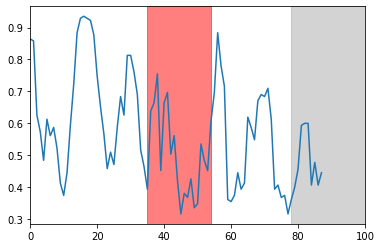

In [29]:
plt.plot(num_matches)
plt.xlim([0, 100])
project_data.shade_axis_using_behavior()

In [25]:
total_matches = [len(p.final_matches) / p.num_possible_matches for k, p in all_matches.items()]

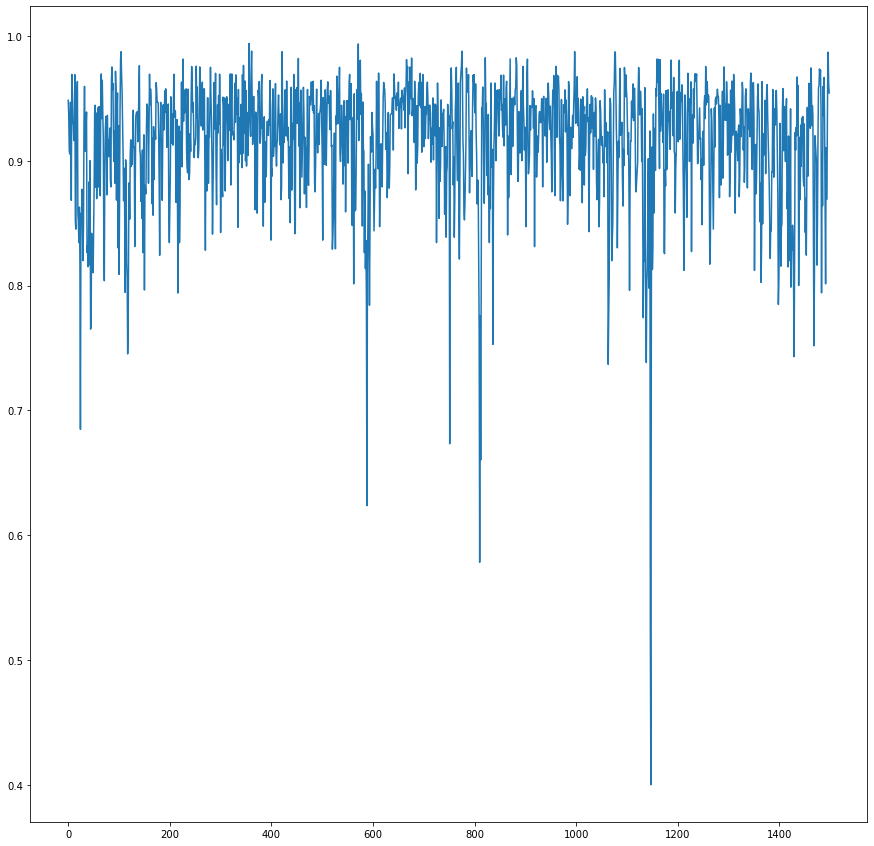

In [27]:
plt.figure(figsize=(15,15))
plt.plot(total_matches)

# Look at the posture using the centerlines

In [33]:

fname = "/project/neurobiology/zimmer/wbfm/centerline/wbfm_ulises_centerline_for_charlie/2021-03-04_16-17-30_worm3_ZIM2051-_spline_X_coords.csv"
centerlineX = pd.read_csv(fname)
fname = "/project/neurobiology/zimmer/wbfm/centerline/wbfm_ulises_centerline_for_charlie/2021-03-04_16-17-30_worm3_ZIM2051-_spline_Y_coords.csv"
centerlineY = pd.read_csv(fname)

In [34]:
fname = "/project/neurobiology/zimmer/wbfm/centerline/wbfm_ulises_centerline_for_charlie/2021-03-04_16-17-30_worm3_ZIM2051-_spline_K.csv"
centerlineK = pd.read_csv(fname)

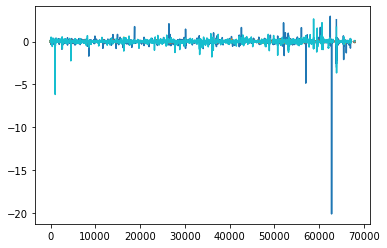

In [36]:
plt.plot(centerlineK);

In [79]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5, whiten=True)
centerlineK_nonan = centerlineK.replace(np.nan, 0.0)


In [125]:
PCA

sklearn.decomposition._pca.PCA

/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


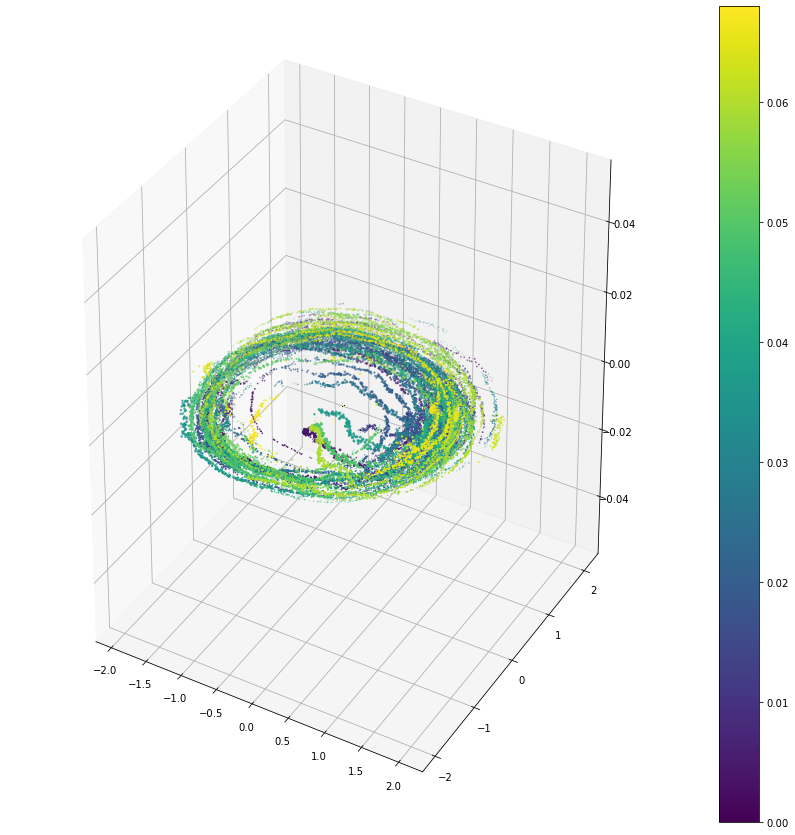

In [80]:
i_start = 2
i_end = -20
tspan = centerlineK.shape[0]
pca_proj = pca.fit_transform(centerlineK_nonan.iloc[:,i_start:i_end])
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(pca_proj[:, 0], pca_proj[:, 1], pca_proj[:, 2], c=np.arange(tspan)/1e6)
plt.colorbar()

# Get nearest neighbors from a reference point

In [81]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=3)
neigh.fit(pca_proj[:, :3])

NearestNeighbors(n_neighbors=3)

array([0.        , 0.0409015 , 0.05292293, 0.07339312, 0.11044909])

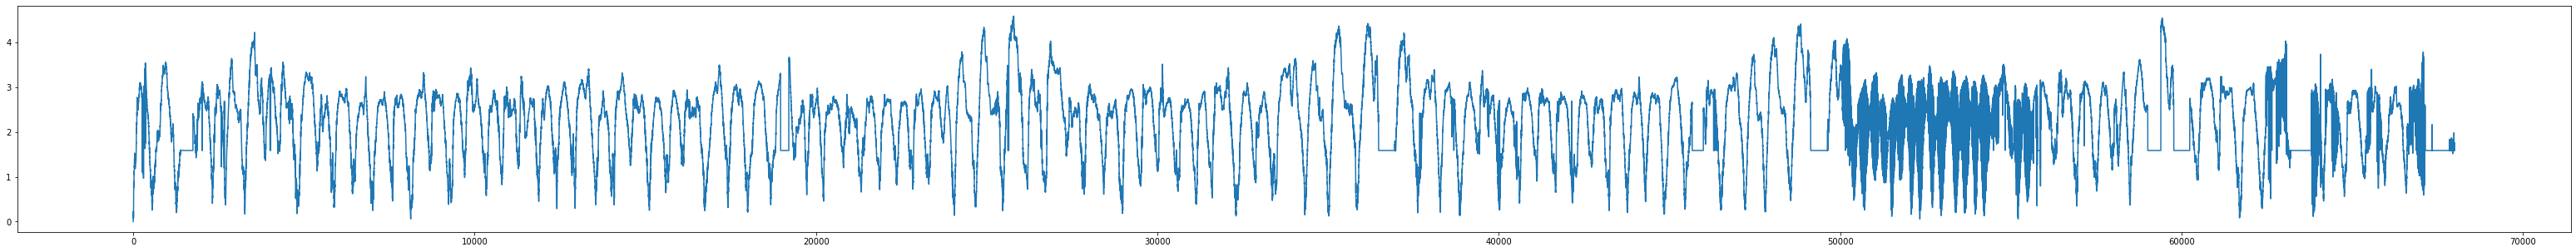

In [122]:
reference_pose = pca_proj[[0], :3]

all_dist = np.linalg.norm(pca_proj[:, :3] - reference_pose, axis=1)
plt.figure(figsize=(55,5))
plt.plot(all_dist)
all_dist[:5]

In [123]:
radius = 0.7

pts, neighboring_ind = neigh.radius_neighbors(reference_pose, radius=radius)
neighboring_ind = neighboring_ind[0]

In [126]:
# Convert to closest volume, round, and remove repeats
frames_per_volume = 32
neighboring_ind = np.round(neighboring_ind / frames_per_volume).astype(int)
neighboring_ind = list(set(neighboring_ind))
neighboring_ind.sort()
# neighboring_ind

TypeError: unsupported operand type(s) for /: 'list' and 'int'

# Use classes

In [1]:
from DLC_for_WBFM.utils.postures.centerline_pca import WormFullVideoPosture, WormReferencePosture
from DLC_for_WBFM.utils.pipeline.tracklet_class import TrackedNeuron, TrackedWorm, TrackletDictionary
from DLC_for_WBFM.utils.projects.finished_project_data import ProjectData
import numpy as np
import pandas as pd
from DLC_for_WBFM.utils.pipeline.matches_class import MatchesWithConfidence



Bad key "text.kerning_factor" on line 4 in
/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# fname = "/scratch/zimmer/Charles/dlc_stacks/worm3-tracklet_wiggle/project_config.yaml"
fname = "/scratch/zimmer/Charles/dlc_stacks/worm3-newseg-2021_11_17/project_config.yaml"

project_data = ProjectData.load_final_project_data_from_config(fname, to_load_tracklets=True, to_load_frames=True)

Output files: /scratch/zimmer/Charles/dlc_stacks/worm3-newseg-2021_11_17/3-tracking/manual_annotation/global2tracklet_manual.pickle, /scratch/zimmer/Charles/dlc_stacks/worm3-newseg-2021_11_17/3-tracking/manual_annotation/manually_split_tracklets.h5, /scratch/zimmer/Charles/dlc_stacks/worm3-newseg-2021_11_17/3-tracking/manual_annotation/split_names.pickle, /scratch/zimmer/Charles/dlc_stacks/worm3-newseg-2021_11_17/3-tracking/manual_annotation/split_times.pickle
Project data for directory:
/scratch/zimmer/Charles/dlc_stacks/worm3-newseg-2021_11_17 
Found the following raw data files:
red_data: True
green_data: True
============Segmentation===============
raw_segmentation: True
segmentation: True
============Tracklets==================
df_training_tracklets: True
reindexed_masks_training: True
============Traces=====================
red_traces: True
green_traces: True
final_tracks: True
behavior_annotations: True



In [3]:
df_tracklets = project_data.df_all_tracklets
num_frames = project_data.num_frames
all_frames = project_data.raw_frames
all_matches = project_data.raw_matches
raw_clust = project_data.raw_clust

frame_pair_options = all_matches[(0,1)].options

In [4]:
fname = "/project/neurobiology/zimmer/wbfm/centerline/wbfm_ulises_centerline_for_charlie/2021-03-04_16-17-30_worm3_ZIM2051-_spline_K.csv"

full_posture = WormFullVideoPosture(fname)

In [5]:
reference_posture = WormReferencePosture(0, full_posture)

In [6]:
# Initialize TrackedNeurons at 0, and initialize the TrackedWorm
# Get all tracklets that start at t=0
all_tracklet_names = df_tracklets.columns.get_level_values(0).drop_duplicates()

worm_obj = TrackedWorm(verbose=3)

for i, name in enumerate(all_tracklet_names):
    tracklet = df_tracklets[name]
    if np.isnan(tracklet['z'].iloc[0]):
        break
    new_neuron = worm_obj.initialize_new_neuron()
    new_neuron.add_tracklet(i, 1.0, tracklet)

Added tracklet 0 to neuron neuron_001 with next gap currently: 117
Added tracklet 1 to neuron neuron_002 with next gap currently: 201
Added tracklet 2 to neuron neuron_003 with next gap currently: 36
Added tracklet 3 to neuron neuron_004 with next gap currently: 99
Added tracklet 4 to neuron neuron_005 with next gap currently: 42
Added tracklet 5 to neuron neuron_006 with next gap currently: 38
Added tracklet 6 to neuron neuron_007 with next gap currently: 119
Added tracklet 7 to neuron neuron_008 with next gap currently: 353
Added tracklet 8 to neuron neuron_009 with next gap currently: 28
Added tracklet 9 to neuron neuron_010 with next gap currently: 32
Added tracklet 10 to neuron neuron_011 with next gap currently: 20
Added tracklet 11 to neuron neuron_012 with next gap currently: 17
Added tracklet 12 to neuron neuron_013 with next gap currently: 11
Added tracklet 13 to neuron neuron_014 with next gap currently: 589
Added tracklet 14 to neuron neuron_015 with next gap currently: 10


In [7]:
from DLC_for_WBFM.utils.feature_detection.class_frame_pair import calc_FramePair_from_Frames
from tqdm.auto import tqdm

long_range_frame_matches = []
anchor_frame = all_frames[0]
# Loop over times, and if any TrackedNeuron's have a gap, use the WormReferencePosture to attempt a long-distance match

for t in tqdm(range(1, num_frames)):
    
    tracks_with_gap = worm_obj.tracks_with_gap_at_or_after_time(t)
    if not tracks_with_gap:
        continue
    
    # Then do one volume-volume match to try and continue all ended tracklets
    i_next_similar_posture = reference_posture.get_next_close_index(t)
    long_range_frame = all_frames[i_next_similar_posture]
    long_range_pair = calc_FramePair_from_Frames(frame0=anchor_frame, frame1=long_range_frame, frame_pair_options=frame_pair_options)
    for track_name, track in tracks_with_gap.items():
        
        # TODO: Convert from neuron match to tracklet
        # i.e. which tracklet belongs to the matched neuron?
        
        # TODO: Also record if the matched neurons match the tracklets that didn't end
        pass
    
    
    print(tracks_with_gap.keys())
    
    if t > 1:
        break

  0%|          | 0/1499 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
dict_keys(['neuron_041', 'neuron_044', 'neuron_072', 'neuron_091'])


In [8]:
long_range_pair.calc_final_matches()
long_range_pair

FramePair with 137/155 matches 

In [9]:
obj = MatchesWithConfidence.matches_from_array(long_range_pair.final_matches)

obj.

SyntaxError: invalid syntax (2012129620.py, line 3)

In [22]:
tracklet_dictionary = TrackletDictionary(df_tracklets, project_data.segmentation_metadata, raw_clust)

# Get the relevant neuron index in the reference frame
key = 'neuron_041'
this_neuron_obj = tracks_with_gap[key]

i_tracklet = this_neuron_obj.neuron_ind
tracklet_dictionary.get_neuron_index_within_tracklet(i_tracklet, t_local=0)

# Get the match in frame1

# Get the position in frame1

# Get the corresponding tracklet

AttributeError: 'TrackedNeuron' object has no attribute 'neuron_ind'

In [ ]:
m = MatchesWithConfidence()

In [18]:
tracklet_dictionary.df_tracklets_zxy

bodyparts   neuron0                                      neuron1              \
coords            z           x           y likelihood         z           x   
0          4.877115  297.774098  424.044846   0.366408  4.542084  313.311412   
1          4.495950  280.282714  407.775260   0.151632  4.130645  298.316611   
2          6.018471  272.740668  406.364028   0.431153  4.173412  287.559807   
3          5.427147  255.625872  396.335380   0.304492  4.098089  271.716247   
4          5.120417  249.088674  407.942513   0.399028  3.630491  264.485370   
...             ...         ...         ...        ...       ...         ...   
1494            NaN         NaN         NaN        NaN       NaN         NaN   
1495            NaN         NaN         NaN        NaN       NaN         NaN   
1496            NaN         NaN         NaN        NaN       NaN         NaN   
1497            NaN         NaN         NaN        NaN       NaN         NaN   
1498            NaN         NaN         NaN        NaN       NaN         NaN   

bodyparts                          neuron2              ... neuron1010807  \
coords              y likelihood         z           x  ...             y   
0          433.153732   0.229242  5.850456  279.902865  ...           NaN   
1          412.867468   0.250947  5.305299  261.702269  ...           NaN   
2          406.981428   0.337725  6.034031  253.445313  ...           NaN   
3          396.642877   0.269064  6.139057  237.078493  ...           NaN   
4          415.498987   0.265040  6.745626  232.108068  ...           NaN   
...               ...        ...       ...         ...  ...           ...   
1494              NaN        NaN       NaN         NaN  ...           NaN   
1495              NaN        NaN       NaN         NaN  ...           NaN   
1496              NaN        NaN       NaN         NaN  ...           NaN   
1497              NaN        NaN       NaN         NaN  ...           NaN   
1498              NaN        NaN       NaN         NaN  ...           NaN   

bodyparts            neuron1010808                    neuron1010809          \
coords    likelihood             z   x   y likelihood             z   x   y   
0                NaN           NaN NaN NaN        NaN           NaN NaN NaN   
1                NaN           NaN NaN NaN        NaN           NaN NaN NaN   
2                NaN           NaN NaN NaN        NaN           NaN NaN NaN   
3                NaN           NaN NaN NaN        NaN           NaN NaN NaN   
4                NaN           NaN NaN NaN        NaN           NaN NaN NaN   
...              ...           ...  ..  ..        ...           ...  ..  ..   
1494             NaN           NaN NaN NaN        NaN           NaN NaN NaN   
1495             NaN           NaN NaN NaN        NaN           NaN NaN NaN   
1496             NaN           NaN NaN NaN        NaN           NaN NaN NaN   
1497             NaN           NaN NaN NaN        NaN           NaN NaN NaN   
1498             NaN           NaN NaN NaN        NaN           NaN NaN NaN   

bodyparts             
coords    likelihood  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN  
...              ...  
1494             NaN  
1495             NaN  
1496             NaN  
1497             NaN  
1498             NaN  

[1499 rows x 43236 columns]

In [147]:
np.where(df_tracklets['neuron0']['z'].notnull())

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116]),)

In [151]:
tracklet['z'].iloc[0]

4.8771146066011655

In [161]:
all_tracklet_names = df_tracklets.columns.get_level_values(0).drop_duplicates()
all_tracklet_names

Index(['neuron0', 'neuron1', 'neuron2', 'neuron3', 'neuron4', 'neuron5',
       'neuron6', 'neuron7', 'neuron8', 'neuron9',
       ...
       'neuron1010800', 'neuron1010801', 'neuron1010802', 'neuron1010803',
       'neuron1010804', 'neuron1010805', 'neuron1010806', 'neuron1010807',
       'neuron1010808', 'neuron1010809'],
      dtype='object', name='bodyparts', length=10809)

In [41]:
np.where(~np.isfinite(centerlineK.shape))

(array([], dtype=int64),)

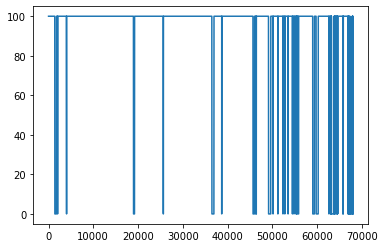

In [45]:
plt.plot(centerlineK.count(axis=1))

In [56]:
centerlineK.shape

(67995, 100)

In [53]:
np.nanmin(centerlineK)

-20.097424644876696